<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Question" data-toc-modified-id="Question-1">Question</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Can-we-accurately-predict-house-values-based-on-other-variables?" data-toc-modified-id="Can-we-accurately-predict-house-values-based-on-other-variables?-1.0.0.1">Can we accurately predict house values based on other variables?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Read-data-and-modify" data-toc-modified-id="Read-data-and-modify-2">Read data and modify</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Create-average-rooms,-average-bedrooms" data-toc-modified-id="Create-average-rooms,-average-bedrooms-2.0.0.1">Create average rooms, average bedrooms</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Split-and-model" data-toc-modified-id="Split-and-model-3">Split and model</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Identify-which-data-is-the-target-and-which-will-be-the-predictor(s)" data-toc-modified-id="Identify-which-data-is-the-target-and-which-will-be-the-predictor(s)-3.0.0.1">Identify which data is the target and which will be the predictor(s)</a></span></li><li><span><a href="#Split-the-dataset-into-test-and-train" data-toc-modified-id="Split-the-dataset-into-test-and-train-3.0.0.2">Split the dataset into test and train</a></span></li><li><span><a href="#Run-the-linear-regression-model" data-toc-modified-id="Run-the-linear-regression-model-3.0.0.3">Run the linear regression model</a></span></li><li><span><a href="#What-are-the-predicted-values?" data-toc-modified-id="What-are-the-predicted-values?-3.0.0.4">What are the predicted values?</a></span></li><li><span><a href="#Examining-results" data-toc-modified-id="Examining-results-3.0.0.5">Examining results</a></span></li><li><span><a href="#Using-coefficients-as-a-way-of-measuring-feature-importance" data-toc-modified-id="Using-coefficients-as-a-way-of-measuring-feature-importance-3.0.0.6">Using coefficients as a way of measuring feature importance</a></span></li></ul></li></ul></li></ul></li></ul></div>

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

import warnings
warnings.filterwarnings('ignore')

# Question

#### Can we accurately predict house values based on other variables?

# Read data and modify

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP_data/housing.csv')
df.columns= df.columns.str.lower()
df.head()

# Notice that each row is associated with a lat/long pair.  Thus median values.

In [ ]:
print(df.shape)
print()
print(df.info())

In [ ]:
df = df.drop('longitude', axis = 1)
df = df.drop('latitude', axis = 1)

In [ ]:
df.isnull().sum()

In [ ]:
df.total_bedrooms.fillna( df.total_bedrooms.mean(),inplace=True )

#### Create average rooms, average bedrooms

In [ ]:
df['avg_rooms'] = round((df.total_rooms/df.households),2)
df['avg_bedrooms'] = round((df.total_bedrooms/df.households),2)
df.head()

In [ ]:
df = df.drop('total_rooms', axis = 1)
df = df.drop('total_bedrooms', axis = 1)

In [ ]:
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [ ]:
#sns.pairplot(df)

# Split and model

In [ ]:
df.columns

#### Identify which data is the target and which will be the predictor(s)

In [ ]:
data = df[['avg_bedrooms', 'population', 'housing_median_age','avg_rooms','households','median_income']]
target = df.median_house_value

#### Split the dataset into test and train

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data,target, test_size = 0.2)

#### Run the linear regression model

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
print('train: ',reg.score( x_train, y_train ))
print('test:  ',reg.score(x_test, y_test))

#### What are the predicted values?

In [ ]:
# Use model to make predictions
y_pred = reg.predict(x_test)
#y_pred

#### Examining results

In [86]:
# Printout relevant metrics
print("Model Coefficients:",reg.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [ 1.68336868e+04 -4.09888714e+01  1.91905524e+03 -4.81944376e+03
  1.44781535e+02  4.51814858e+04]
Mean Absolute Error: 56724.3505735962
Coefficient of Determination: 0.5657494878933816


#### Using coefficients as a way of measuring feature importance

- Coefficients can provide the basis for a crude feature importance score. 
- This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

In [87]:
# summarize feature importance
for i,v in enumerate(reg.coef_):
	print('Feature: %0d, Score: %.2f' % (i,v))

Feature: 0, Score: 16833.69
Feature: 1, Score: -40.99
Feature: 2, Score: 1919.06
Feature: 3, Score: -4819.44
Feature: 4, Score: 144.78
Feature: 5, Score: 45181.49


In [91]:
# A cleaner view of the coefficients
features = pd.DataFrame(reg.coef_, x_train.columns, columns=['coefficient'])
features.head()

,coefficient
avg_bedrooms,16833.686785
population,-40.988871
housing_median_age,1919.055236
avg_rooms,-4819.443759
households,144.781535


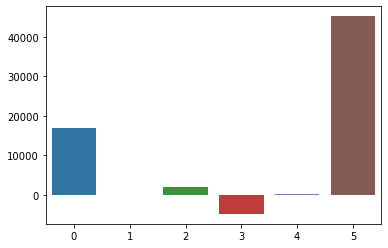

In [92]:
# plot feature importance
sns.barplot([x for x in range(len(reg.coef_))], importance)
plt.show()


Image result for sklearn linear regression feature importance
Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable